# MLP-LVQ Comparison

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Define Columns Name

In [2]:
cols = ['Gender','Income','Age','Rentals','Avg Visit','Incidentals','Genre']

### Read Data and Display in Dataframe

In [3]:
df = pd.read_csv('C:/Users/aftermath/Documents/CS-101/JARINGAN SARAF TIRUAN/tugas1/2.MLP-LVQ Comparison/Video-Store.csv', header=None, names=cols)
df = df.drop([df.index[0]])
df.reset_index(drop=True, inplace=True)

df.head()

,Gender,Income,Age,Rentals,Avg Visit,Incidentals,Genre
0,M,45000,25,27,2.5,Yes,Action
1,F,54000,33,12,3.4,No,Drama
2,F,32000,20,42,1.6,No,Comedy
3,F,59000,70,16,4.2,Yes,Drama
4,M,37000,35,25,3.2,Yes,Action


In [4]:
df.describe()

,Gender,Income,Age,Rentals,Avg Visit,Incidentals,Genre
count,50,50,50,50,50,50,50
unique,2,36,25,32,27,2,3
top,M,41000,25,22,2.7,Yes,Drama
freq,26,3,7,3,3,26,20


### Check Missing Values

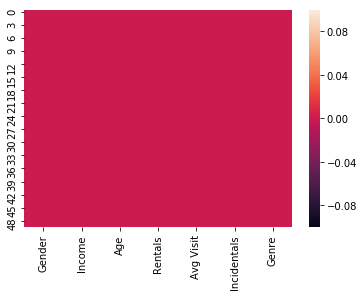

In [5]:
missing_values = df.isnull()
sns.heatmap(data = missing_values)


### One-hot Encode String Data

In [6]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Incidentals'] = labelencoder.fit_transform(df['Incidentals'])
df['Genre'] = labelencoder.fit_transform(df['Genre'])

In [7]:
df.head()

,Gender,Income,Age,Rentals,Avg Visit,Incidentals,Genre
0,1,45000,25,27,2.5,1,0
1,0,54000,33,12,3.4,0,2
2,0,32000,20,42,1.6,0,1
3,0,59000,70,16,4.2,1,2
4,1,37000,35,25,3.2,1,0


### Target Class

2    20
0    18
1    12
Name: Genre, dtype: int64

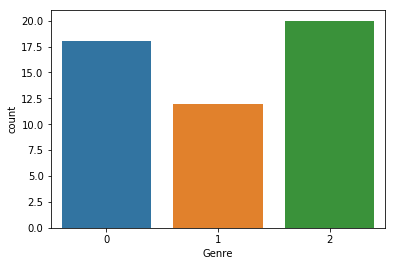

In [8]:
sns.countplot(x='Genre', data=df)
df.Genre.value_counts()

### Prepare Train-test Data

In [9]:
feature_cols = ['Gender','Income','Age','Rentals','Avg Visit','Incidentals']
features = df[feature_cols]
labels = df['Genre']

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [12]:
scaler.fit(features)
features = scaler.transform(features)


C:\Users\aftermath\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=101)

# Multi Layer Perceptron

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [68]:
mlpmodel = MLPClassifier(hidden_layer_sizes=(20),max_iter=10000)

score =  cross_val_score(mlpmodel, features, labels, cv=5)
print("CROSS VALIDATION SCORE : ",statistics.mean(score))

mlpmodel.fit(X_train,y_train)
print("TRAIN SCORE: ",mlpmodel.score(X_train,y_train))
print("TEST SCORE: ",mlpmodel.score(X_test,y_test))

CROSS VALIDATION SCORE :  0.4903030303030303
TRAIN SCORE:  0.95
TEST SCORE:  0.7


### Classification Report

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.50      0.50      0.50         2
           2       1.00      0.71      0.83         7

   micro avg       0.70      0.70      0.70        10
   macro avg       0.61      0.74      0.61        10
weighted avg       0.83      0.70      0.73        10



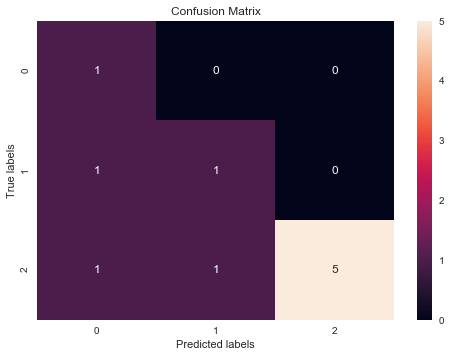

In [69]:
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import confusion_matrix  

y_pred = mlpmodel.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g') #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 

plt.show()

# Learning Vector Quantization

In [50]:
from LVQClassifier import LVQClassifier as LVQ
#LVQClassifier: http://www.astrowing.eu/python_routines/LVQClassifier.py
#http://www.astrowing.eu/data-science/learning-vector-quantization

In [70]:
lvqmodel = LVQ(n_components=3,epochs=10000)

score =  cross_val_score(lvqmodel, features, labels, cv=5)
print("CROSS VALIDATION SCORE : ",statistics.mean(score))

lvqmodel.fit(X_train,y_train)
print("TRAIN SCORE: ",lvqmodel.score(X_train,y_train))
print("TEST SCORE: ",lvqmodel.score(X_test,y_test))

CROSS VALIDATION SCORE :  0.4818181818181818
TRAIN SCORE:  0.525
TEST SCORE:  0.3


### Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.20      0.50      0.29         2
           2       1.00      0.29      0.44         7

   micro avg       0.30      0.30      0.30        10
   macro avg       0.40      0.26      0.24        10
weighted avg       0.74      0.30      0.37        10



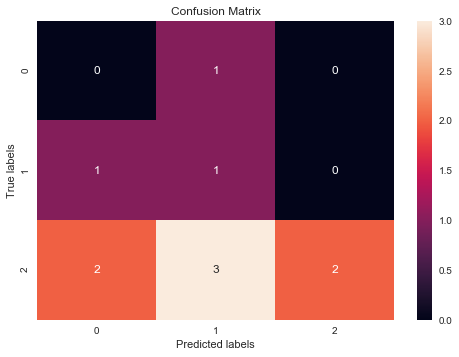

In [71]:
y_pred = lvqmodel.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g') #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 

plt.show()